<a href="https://colab.research.google.com/github/ghulam2545/deep_learning/blob/main/z_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Medical Images Analysis using Deep Learning**

> Ghulam Mustafa  (19BTCS051HY)

> Mohd Shafi  (19BTCS004HY)

Image dataset source (kaggle)  
https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

#Importing the necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.applications import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import Model

Checking if GPU is available

In [ ]:
print('GPU is available' if tf.config.list_physical_devices('GPU') else 'GPU is not available')

GPU is available


#Directory locations for the image datasets
In our case these images are stored in google drive.

In [ ]:
train_dir = '/content/drive/MyDrive/dataset/chest_xray/train'
test_dir = '/content/drive/MyDrive/dataset/chest_xray/test'

#Preprocessing steps for the training dataset

In [ ]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

#Preprocessing steps for the test dataset

In [ ]:
test_generator = ImageDataGenerator(
    rescale = 1. / 255
)

#Global parameters

In [ ]:
img_dim = (224, 224)
batch_size = 32
train_steps_per_epoch = 100
valid_steps_per_epoch = 50

#Loading the training dataset into the program

In [ ]:
train_ds = train_generator.flow_from_directory(
    train_dir,
    target_size=img_dim,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    subset='training'
)

Found 4131 images belonging to 2 classes.


#Loading the validation dataset into the program

In [ ]:
val_ds = train_generator.flow_from_directory(
    train_dir,
    target_size=img_dim,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    subset='validation'
)

Found 1032 images belonging to 2 classes.


#Loading the test dataset into the program

In [ ]:
test_ds = test_generator.flow_from_directory(
    test_dir,
    target_size=img_dim,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

Found 613 images belonging to 2 classes.


#Checking the structure/specification of the datasets

In [ ]:
x_train, y_train = train_ds.next() # Getting a batch of training samples

print("Training dataset shape:")
print(x_train.shape) # Shape of the input images (batch_size, height, width, channels)
print(y_train.shape) # Shape of the corresponding labels (batch_size,)

Training dataset shape:
(32, 224, 224, 3)
(32,)


#Visualizing some training images
since we are using multiple image augumentation steps on images, so image visualization will be random (e.g: flip, rotate, zoom etc)

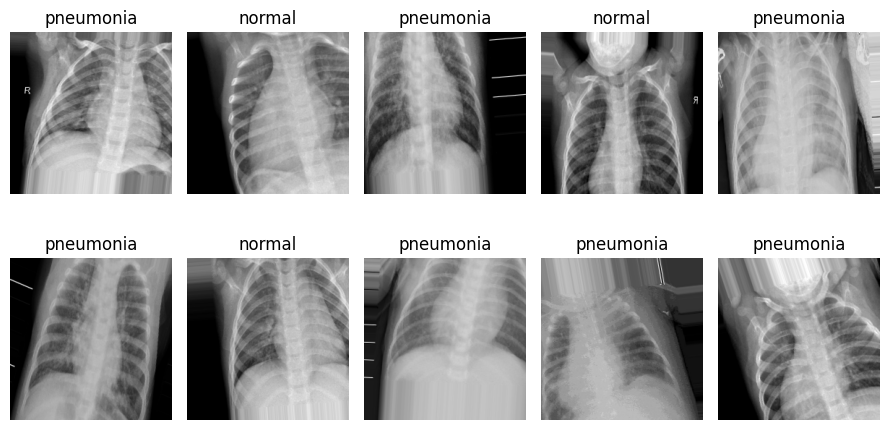

In [ ]:
plt.figure(figsize=(9, 5))
for i in range(2 * 5):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_train[i])
  plt.title('normal' if int(y_train[i]) == 0 else 'pneumonia')
  plt.axis('off')
plt.tight_layout()
plt.show()

#Model architecture
model intro:<br>
Inception v3 is a convolutional neural network for assisting in image analysis and object detection, and got its start as a module for GoogLeNet. It is the third edition of Google's Inception Convolutional Neural Network, originally introduced during the ImageNet Recognition Challenge.

In [ ]:
# Load the InceptionV3 model with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_dim[0], img_dim[1], 3))

87910968/87910968 [==============================] - 4s 0us/step


In [ ]:
# Add custom classification layers on top of the pre-trained base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

In [ ]:
# Create the model
model = Model(inputs=base_model.input, outputs=output)

In [ ]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Printing the summary of the model

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

#Saving the model architecture diagram
In pdf format (optional)

In [ ]:
keras.utils.plot_model(model, to_file='/content/drive/MyDrive/leNet.pdf', show_shapes=True)

#Training the model
Most important steps, would take roughly 1hr 35min.

In [ ]:
history = model.fit(
    train_ds,
    steps_per_epoch=train_steps_per_epoch,
    validation_data=val_ds,
    validation_steps=valid_steps_per_epoch,
    epochs=8,
    use_multiprocessing=True
)

Epoch 1/8
100/100 [==============================] - 2264s 23s/step - loss: 0.3329 - accuracy: 0.8653 - val_loss: 0.3559 - val_accuracy: 0.8376
Epoch 2/8
100/100 [==============================] - 440s 4s/step - loss: 0.2280 - accuracy: 0.9063 - val_loss: 0.2567 - val_accuracy: 0.8940
Epoch 3/8
100/100 [==============================] - 252s 3s/step - loss: 0.2130 - accuracy: 0.9142 - val_loss: 0.1984 - val_accuracy: 0.9143
Epoch 4/8
100/100 [==============================] - 230s 2s/step - loss: 0.1832 - accuracy: 0.9275 - val_loss: 0.1813 - val_accuracy: 0.9277
Epoch 5/8
100/100 [==============================] - 207s 2s/step - loss: 0.1860 - accuracy: 0.9256 - val_loss: 0.2084 - val_accuracy: 0.9143
Epoch 6/8
100/100 [==============================] - 222s 2s/step - loss: 0.1841 - accuracy: 0.9237 - val_loss: 0.2113 - val_accuracy: 0.9118
Epoch 7/8
100/100 [==============================] - 220s 2s/step - loss: 0.1886 - accuracy: 0.9237 - val_loss: 0.2806 - val_accuracy: 0.8845
Epoc

#Evaluating the model on the test dataset

In [ ]:
test_loss, test_acc = model.evaluate(test_ds, verbose=1)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

20/20 [==============================] - 319s 17s/step - loss: 0.4627 - accuracy: 0.8091
Test Loss: 0.4626673460006714
Test Accuracy: 0.809135377407074


#Visualizing the training and validation performance
plotting neccessary diagrams.

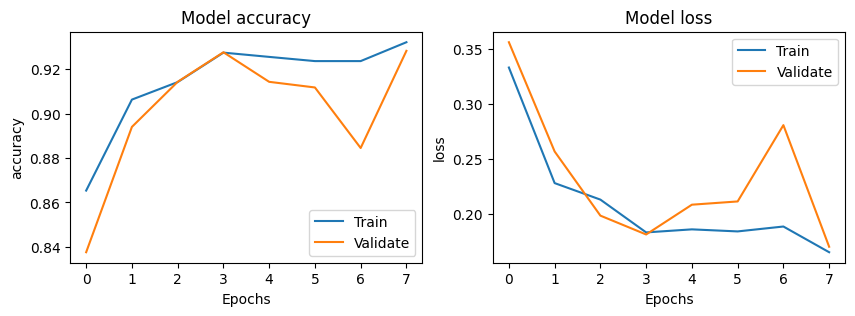

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, metric in enumerate(['accuracy', 'loss']):
  ax[i].plot(history.history[metric])
  ax[i].plot(history.history['val_' + metric])
  ax[i].set_title('Model {}'.format(metric))
  ax[i].set_xlabel('Epochs')
  ax[i].set_ylabel(metric)
  ax[i].legend(['Train', 'Validate'])

#Saving the model in the memory in h5 format

In [ ]:
save_location = '/content/drive/MyDrive/lenet_h5_model.h5'
model.save(save_location)

**Now that we have trained and compiled the model, it is ready for further use. We can reuse this model for making predictions on new data.**